In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

import analysis
import plotting

In [42]:
from string import ascii_lowercase

In [27]:
import matplotlib

matplotib = plotting.plot_utils.set_mpl_defaults(matplotlib)

In [7]:
from os.path import join

In [10]:
# Load choiceshares (including RST)
cs = pd.read_csv(
    join("..", "results", "1-behaviour", "choiceshares_across-targets.csv")
)
cs

,subject,effect,A,B,C,competitor,decoy,target,rst
0,0,attraction,0.5000,0.4583,0.0417,0.1979,0.0417,0.7604,0.7935
1,0,compromise,0.4375,0.3229,0.2396,0.1875,0.2396,0.5729,0.7534
2,1,attraction,0.1667,0.8229,0.0104,0.4688,0.0104,0.5208,0.5263
3,1,compromise,0.1771,0.5833,0.2396,0.5208,0.2396,0.2396,0.3151
4,2,attraction,0.8125,0.1875,0.0000,0.5000,0.0000,0.5000,0.5000
...,...,...,...,...,...,...,...,...,...
75,41,compromise,0.1979,0.4896,0.3125,0.3021,0.3125,0.3854,0.5606
76,42,attraction,0.3750,0.6042,0.0208,0.2812,0.0208,0.6979,0.7128
77,42,compromise,0.3542,0.2708,0.3750,0.2917,0.3750,0.3333,0.5333
78,43,attraction,0.0521,0.8854,0.0625,0.5104,0.0625,0.4271,0.4556


In [12]:
# Load mean dwells
dw = pd.read_csv(join("..", "results", "2-gaze", "dwells_across-targets.csv"))
dw

,subject,effect,dwell_A,dwell_B,dwell_C,dwell_p,dwell_m,dwell_target,dwell_competitor,dwell_decoy
0,0,attraction,0.3366,0.3523,0.3111,0.4923,0.5077,0.3818,0.3071,0.3111
1,0,compromise,0.3198,0.3627,0.3175,0.4960,0.5040,0.3651,0.3174,0.3175
2,1,attraction,0.2968,0.3954,0.3079,0.5297,0.4703,0.3508,0.3413,0.3079
3,1,compromise,0.3148,0.3758,0.3094,0.5483,0.4517,0.3471,0.3435,0.3094
4,2,attraction,0.3701,0.3508,0.2791,0.4855,0.5145,0.3507,0.3702,0.2791
...,...,...,...,...,...,...,...,...,...,...
75,41,compromise,0.3207,0.3627,0.3166,0.5376,0.4624,0.3625,0.3208,0.3166
76,42,attraction,0.3581,0.3322,0.3097,0.5180,0.4820,0.3605,0.3299,0.3097
77,42,compromise,0.3591,0.3490,0.2919,0.5016,0.4984,0.3786,0.3295,0.2919
78,43,attraction,0.2501,0.4258,0.3241,0.4747,0.5253,0.3349,0.3410,0.3241


In [18]:
# Load GLA estimates
est = pd.read_csv(
    join("..", "results", "3-behavioural-modeling", "estimates", "estimates_de1.csv"),
).drop("Unnamed: 0", axis=1)
gla = est.loc[
    est["model"] == "glickman1layer",
    ["subject", "nll", "bic", "alpha", "beta", "gamma", "lam", "theta"],
].reset_index(drop=True)
gla

,subject,nll,bic,alpha,beta,gamma,lam,theta
0,0,100.209667,227.499835,0.440810,3.055906,0.563298,0.453037,0.512099
1,1,124.107191,275.294884,0.411877,0.705825,1.000000,0.082291,0.470740
2,2,75.038395,177.157292,0.129768,7.631085,1.000000,0.209830,0.832039
3,3,98.282816,223.646134,0.277980,26.315988,0.253684,0.287496,0.781941
4,4,158.310361,343.701224,0.378981,0.853402,1.000000,0.189743,0.463484
5,5,77.843656,182.767815,0.156297,9.995409,1.000000,0.650458,0.769331
6,6,71.232322,169.500502,0.892777,2.078319,0.877167,0.491287,0.902051
7,7,103.929222,234.938947,0.692229,1.018356,0.632761,0.109292,0.771030
8,8,107.445393,241.971288,0.148822,9.258594,1.000000,0.335493,0.851709
9,9,51.959634,130.999771,0.228329,4.724255,1.000000,0.123819,0.644088


# 1. Does longer gaze to decoy relate to higher RST?

In [24]:
df = cs.merge(dw, on=["subject", "effect"])[
    ["subject", "effect", "rst", "dwell_target", "dwell_decoy"]
]
df.head()

,subject,effect,rst,dwell_target,dwell_decoy
0,0,attraction,0.7935,0.3818,0.3111
1,0,compromise,0.7534,0.3651,0.3175
2,1,attraction,0.5263,0.3508,0.3079
3,1,compromise,0.3151,0.3471,0.3094
4,2,attraction,0.5000,0.3507,0.2791


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Attraction trials


Sequential sampling (2 chains in 1 job)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
/Users/felixmolter/miniconda3/envs/gda-context/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Compromise trials


Sequential sampling (2 chains in 1 job)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/Users/felixmolter/miniconda3/envs/gda-context/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


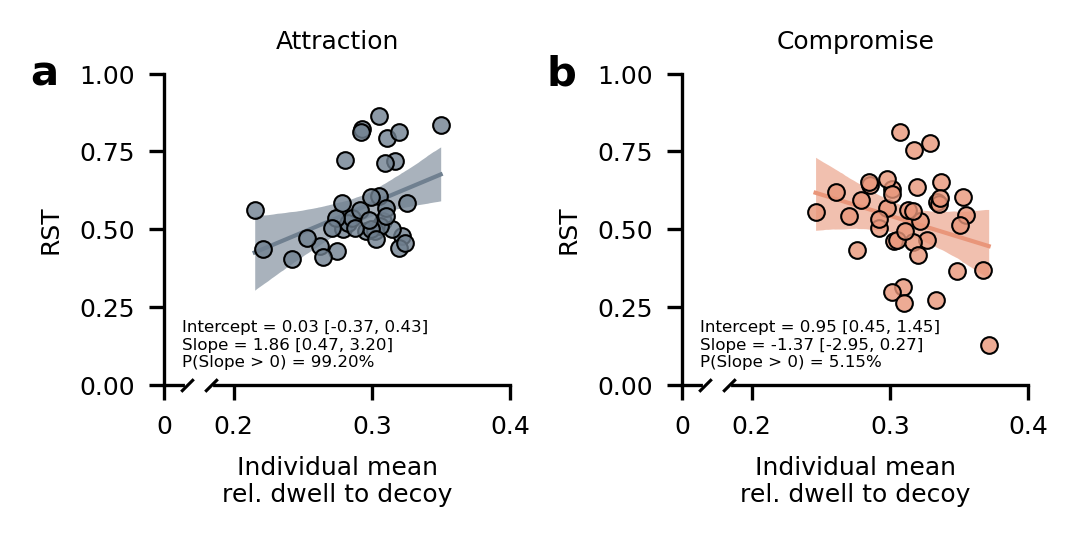

In [46]:
output = {}
fig, axs = plt.subplots(1, 2, figsize=(plotting.plot_utils.cm2inch((9, 4.5))))

colors = ["slategray", "darksalmon"]

for e, (effect, ax) in enumerate(zip(["attraction", "compromise"], axs)):
    print(effect.capitalize() + " trials")
    df_e = df.loc[df["effect"] == effect]

    output = plotting.plot_share.lm(
        x=df_e["dwell_decoy"],
        y=df_e["rst"],
        ax=ax,
        scatter_color=colors[e],
        line_color=colors[e],
        sample_kwargs={"cores": 1, "random_seed": 44},
    )
    ax, trace, summary = output

    summary.loc["x", "P>0"] = np.mean(trace.get_values("x") > 0)

    stat_str = (
        f"Intercept = {summary.loc['Intercept', 'mean']:.2f} [{summary.loc['Intercept', 'hdi_2.5%']:.2f}, {summary.loc['Intercept', 'hdi_97.5%']:.2f}]"
        + "\n"
        + f"Slope = {summary.loc['x', 'mean']:.2f} [{summary.loc['x', 'hdi_2.5%']:.2f}, {summary.loc['x', 'hdi_97.5%']:.2f}]"
        + "\n"
        + f"P(Slope > 0) = {100 * summary.loc['x', 'P>0']:.2f}%"
    )
    ax.annotate(
        stat_str,
        [0.05, 0.05],
        ha="left",
        va="bottom",
        fontsize=4,
        xycoords="axes fraction",
    )

    # Labels and limits
    ax.set_xlabel("Individual mean\nrel. dwell to decoy")
    ax.set_ylabel("RST")
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xlim(0.15, 0.4)
    ax.set_xticks([0.15, 0.2, 0.3, 0.4])
    ax.set_xticklabels([0, 0.2, 0.3, 0.4])
    ax.set_title(effect.capitalize())
    ax = plotting.plot_utils.break_after_nth_tick(ax, 0)

fig.tight_layout()

# Label panels
for ax, label in zip(axs, list(ascii_lowercase)):
    # Place axis labels in figure space, so that they are aligned
    # https://stackoverflow.com/a/52309638
    xshift = 0.1
    X = ax.get_position().x0
    Y = ax.get_position().y1
    fig.text(X - xshift, Y, label, size=10, weight="bold", ha="right", va="center")

### Run a regression model for this to test the interaction, too

## On the individual level

Splitting trials into longer and shorter dwell to decoy, then calculating probability of choosing the target, and comparing.

In [76]:
trials = pd.read_csv(join("..", "results", "0-clean_data", "trials_with-dwells.csv"))

# Add median dwell decoy for each subject and effect
trials = trials.merge(
    trials.groupby(["subject", "effect"], as_index=False)["dwell_decoy"]
    .quantile(0.5)
    .rename({"dwell_decoy": "median_dwell_decoy"}, axis=1),
    on=["subject", "effect"],
)
trials["dwell_decoy_split"] = np.where(
    trials["dwell_decoy"] <= trials["median_dwell_decoy"], "short", "long"
)
trials["target_chosen"] = trials["choice_tcd"] == "target"
trials.head()

,subject,block,trial,effect,target,key,choice,choice_tcd,rt,pA,...,dwell_Bm,dwell_Cp,dwell_Cm,dwell_total,dwell_target,dwell_competitor,dwell_decoy,median_dwell_decoy,dwell_decoy_split,target_chosen
0,0,1,1,attraction,A,M,A,target,7220.0,0.78,...,0.039272,0.152557,0.091194,5296.395,0.566120,0.190129,0.243751,0.320022,short,True
1,0,1,2,attraction,B,M,B,target,7770.0,0.78,...,0.329696,0.163684,0.055725,6873.000,0.484941,0.295650,0.219409,0.320022,short,True
2,0,1,3,attraction,A,M,C,decoy,5870.0,0.72,...,0.130233,0.273690,0.068932,4991.041,0.293726,0.363652,0.342622,0.320022,long,False
3,0,1,4,attraction,B,L,C,decoy,9550.0,0.78,...,0.238737,0.221803,0.198053,8444.449,0.390671,0.189474,0.419856,0.320022,long,False
4,0,1,17,attraction,B,M,C,decoy,6430.0,0.72,...,0.153818,0.136831,0.238377,5356.978,0.416466,0.208326,0.375207,0.320022,long,False


In [81]:
trials.loc[trials["effect"].isin(["attraction", "compromise"])].groupby(
    ["effect", "dwell_decoy_split"]
)["target_chosen"].mean()

effect      dwell_decoy_split
attraction  long                 0.621283
            short                0.503391
compromise  long                 0.342544
            short                0.445255
Name: target_chosen, dtype: float64

The probability of choosing the target is higher in attraction trials, when the decoy was looked at longer.  
In contrast, in compromise trials, the probability of choosing the target is *lower*, when the decoy was looked at longer.

In [83]:
subject_means = (
    trials.loc[trials["effect"].isin(["attraction", "compromise"])]
    .groupby(["subject", "effect", "dwell_decoy_split"], as_index=False)[
        "target_chosen"
    ]
    .mean()
    .pivot_table(
        index=["subject", "effect"], values="target_chosen", columns="dwell_decoy_split"
    )
    .reset_index()
)
subject_means

dwell_decoy_split,subject,effect,long,short
0,0,attraction,0.791667,0.729167
1,0,compromise,0.437500,0.708333
2,1,attraction,0.562500,0.479167
3,1,compromise,0.208333,0.270833
4,2,attraction,0.541667,0.458333
...,...,...,...,...
75,41,compromise,0.260870,0.500000
76,42,attraction,0.729167,0.666667
77,42,compromise,0.270833,0.395833
78,43,attraction,0.479167,0.375000


In [88]:
for e, effect in enumerate(["attraction", "compromise"]):
    print(effect.capitalize())

    df_e = subject_means.loc[subject_means["effect"] == effect]

    trace = analysis.best.runBEST1G(
        df_e["long"] - df_e["short"],
        mu=0,
        sigma_low=0.0001,
        sample_kwargs={"cores": 1, "random_seed": 56},
    )

    summary_df = pm.summary(trace, hdi_prob=0.95)
    for var in ["mean", "difference", "d"]:
        summary_df.loc[var, "p>0"] = np.mean(trace.get_values(var) > 0)

    print(
        f"\tmean difference = {summary_df.loc['difference', 'mean']} [{summary_df.loc['difference', 'hdi_97.5%']}, {summary_df.loc['difference', 'hdi_2.5%']}]"
    )
    print(
        f"\td = {summary_df.loc['d', 'mean']} [{summary_df.loc['d', 'hdi_2.5%']}, {summary_df.loc['d', 'hdi_97.5%']}]"
    )

    print(
        "\t{}% of posterior mass above 0.".format(
            100 * np.mean(trace.get_values("d") > 0)
        )
    )

Attraction


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu_minus_one, sd, mean]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
/Users/felixmolter/miniconda3/envs/gda-context/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


	mean difference = 0.116 [0.141, 0.093]
	d = 1.777 [1.182, 2.448]
	100.0% of posterior mass above 0.
Compromise


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu_minus_one, sd, mean]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
/Users/felixmolter/miniconda3/envs/gda-context/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


	mean difference = -0.107 [-0.06, -0.152]
	d = -0.822 [-1.259, -0.382]
	0.0% of posterior mass above 0.


This was also very very significant.

# GLA estimates and RST

In [48]:
df = cs.merge(gla, on=["subject"])[["subject", "effect", "rst", "theta"]]
df.head()

,subject,effect,rst,theta
0,0,attraction,0.7935,0.512099
1,0,compromise,0.7534,0.512099
2,1,attraction,0.5263,0.470740
3,1,compromise,0.3151,0.470740
4,2,attraction,0.5000,0.832039


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Attraction trials


Sequential sampling (2 chains in 1 job)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/felixmolter/miniconda3/envs/gda-context/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Compromise trials


Sequential sampling (2 chains in 1 job)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.
/Users/felixmolter/miniconda3/envs/gda-context/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


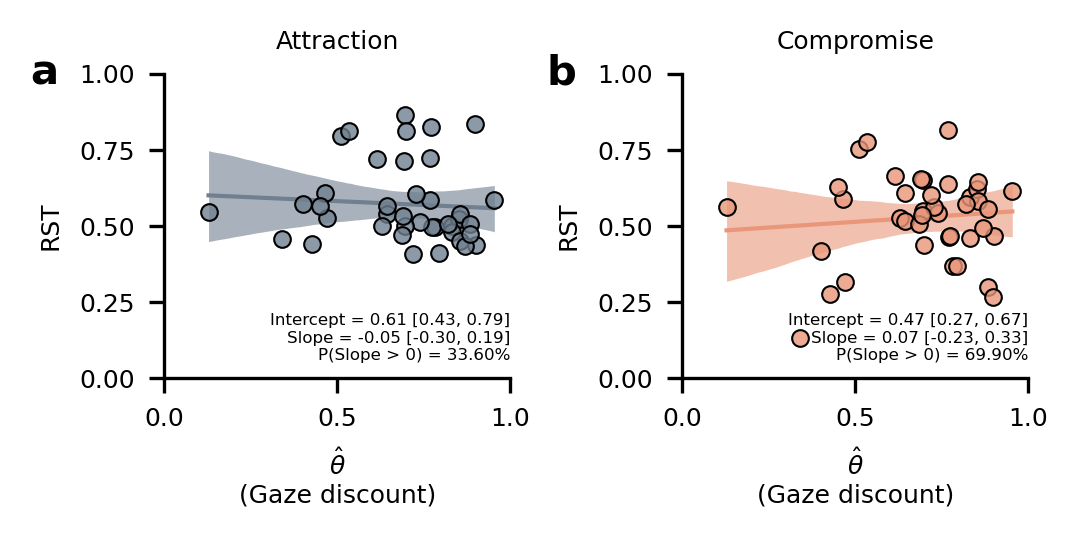

In [61]:
output = {}
fig, axs = plt.subplots(1, 2, figsize=(plotting.plot_utils.cm2inch((9, 4.5))))

colors = ["slategray", "darksalmon"]

for e, (effect, ax) in enumerate(zip(["attraction", "compromise"], axs)):
    print(effect.capitalize() + " trials")
    df_e = df.loc[df["effect"] == effect]

    output = plotting.plot_share.lm(
        x=df_e["theta"],
        y=df_e["rst"],
        ax=ax,
        scatter_color=colors[e],
        line_color=colors[e],
        sample_kwargs={"cores": 1, "random_seed": 44},
    )
    ax, trace, summary = output

    summary.loc["x", "P>0"] = np.mean(trace.get_values("x") > 0)

    stat_str = (
        f"Intercept = {summary.loc['Intercept', 'mean']:.2f} [{summary.loc['Intercept', 'hdi_2.5%']:.2f}, {summary.loc['Intercept', 'hdi_97.5%']:.2f}]"
        + "\n"
        + f"Slope = {summary.loc['x', 'mean']:.2f} [{summary.loc['x', 'hdi_2.5%']:.2f}, {summary.loc['x', 'hdi_97.5%']:.2f}]"
        + "\n"
        + f"P(Slope > 0) = {100 * summary.loc['x', 'P>0']:.2f}%"
    )
    ax.annotate(
        stat_str,
        [1.0, 0.05],
        ha="right",
        va="bottom",
        fontsize=4,
        xycoords="axes fraction",
    )

    # Labels and limits
    ax.set_xlabel(r"$\hat{\theta}$" + "\n(Gaze discount)")
    ax.set_ylabel("RST")
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xlim(0.15, 0.4)
    ax.set_xticks([0, 0.5, 1.0])
    ax.set_title(effect.capitalize())

fig.tight_layout()

# Label panels
for ax, label in zip(axs, list(ascii_lowercase)):
    # Place axis labels in figure space, so that they are aligned
    # https://stackoverflow.com/a/52309638
    xshift = 0.1
    X = ax.get_position().x0
    Y = ax.get_position().y1
    fig.text(X - xshift, Y, label, size=10, weight="bold", ha="right", va="center")

# Did dwell to decoy generally differ between attraction and compromise trials?

In [91]:
df = (
    dw[["subject", "effect", "dwell_decoy"]]
    .pivot_table(index=["subject"], values=["dwell_decoy"], columns="effect")
    .reset_index()
)
df.head()

subject dwell_decoy           
effect          attraction compromise
0            0      0.3111     0.3175
1            1      0.3079     0.3094
2            2      0.2791     0.2793
3            3      0.2957     0.3488
4            4      0.3051     0.3338

In [100]:
trace = analysis.best.runBEST1G(
    df[("dwell_decoy", "attraction")] - df[("dwell_decoy", "compromise")],
    mu=0,
    sigma_low=0.0001,
    sample_kwargs={"cores": 1, "random_seed": 56},
)

summary_df = pm.summary(trace, hdi_prob=0.95)
for var in ["mean", "difference", "d"]:
    summary_df.loc[var, "p>0"] = np.mean(trace.get_values(var) > 0)

print(
    f"\tmean difference = {summary_df.loc['difference', 'mean']} [{summary_df.loc['difference', 'hdi_97.5%']}, {summary_df.loc['difference', 'hdi_2.5%']}]"
)
print(
    f"\td = {summary_df.loc['d', 'mean']} [{summary_df.loc['d', 'hdi_2.5%']}, {summary_df.loc['d', 'hdi_97.5%']}]"
)

print(
    "\t{}% of posterior mass above 0.".format(100 * np.mean(trace.get_values("d") > 0))
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu_minus_one, sd, mean]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.
/Users/felixmolter/miniconda3/envs/gda-context/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


	mean difference = -0.02 [-0.008, -0.032]
	d = -0.541 [-0.887, -0.186]
	0.0% of posterior mass above 0.


Decoys were looked at longer in compromise than attraction trials.